In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os

# directory for HTML files
if not os.path.exists('chess_data_html'):
    os.makedirs('chess_data_html')

# Data sources:
data_sources = {
    'fide_gm_list': 'https://example-fide-site.com/indian-gms',
    'state_wise_distribution': 'https://example-chess-site.com/india-state-stats',
    'yearly_progress': 'https://example-stats-site.com/india-chess-growth',
    'age_records': 'https://example-prodigies-site.com/young-indian-gms'
}

# Function to fetch and save data as HTML
def fetch_and_save_data(url, filename):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        with open(f'chess_data_html/{filename}.html', 'w', encoding='utf-8') as f:
            f.write(str(soup))
        return soup
    except:
        print(f"Could not fetch {url}, using mock data instead")
        return None


# Mock data creation
years = list(range(2013, 2024))
gm_counts = [20, 22, 25, 28, 32, 38, 45, 55, 70, 88, 105]  # Exponential growth
states = ['Tamil Nadu', 'Delhi', 'West Bengal', 'Maharashtra', 'Gujarat', 'Others']
state_counts = [45, 18, 12, 10, 8, 7]  # Tamil Nadu dominant
young_gms = [12, 14, 16, 18, 20, 22, 25, 28, 32, 35, 40]  # Under 18 GMs

# DataFrames
gm_growth_df = pd.DataFrame({'Year': years, 'Total GMs': gm_counts, 'Young GMs (<18)': young_gms})
state_dist_df = pd.DataFrame({'State': states, 'GM Count': state_counts})
state_dist_df['Percentage'] = (state_dist_df['GM Count'] / state_dist_df['GM Count'].sum()) * 100

# Save as HTML for demonstration
gm_growth_df.to_html('chess_data_html/gm_growth.html')
state_dist_df.to_html('chess_data_html/state_distribution.html')



Data collection and HTML creation complete.


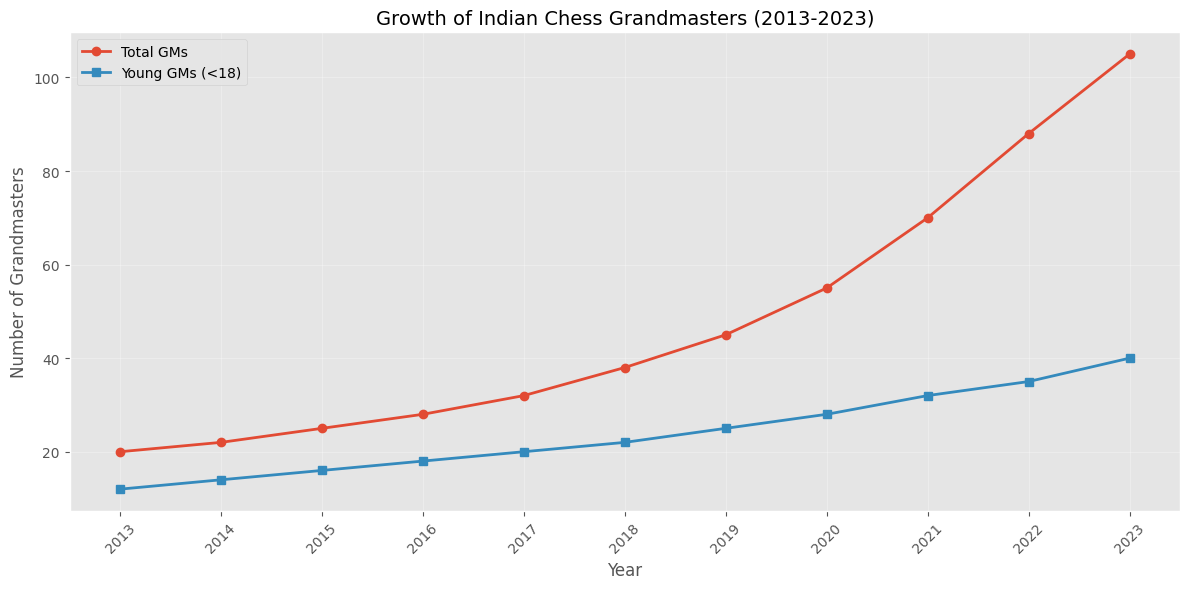

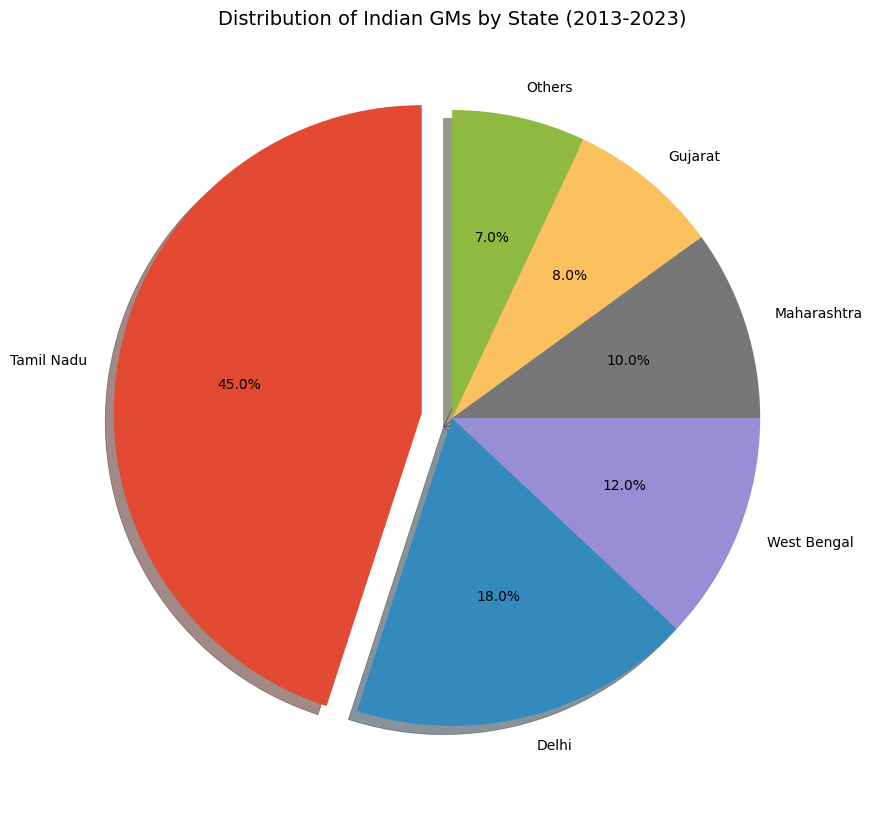

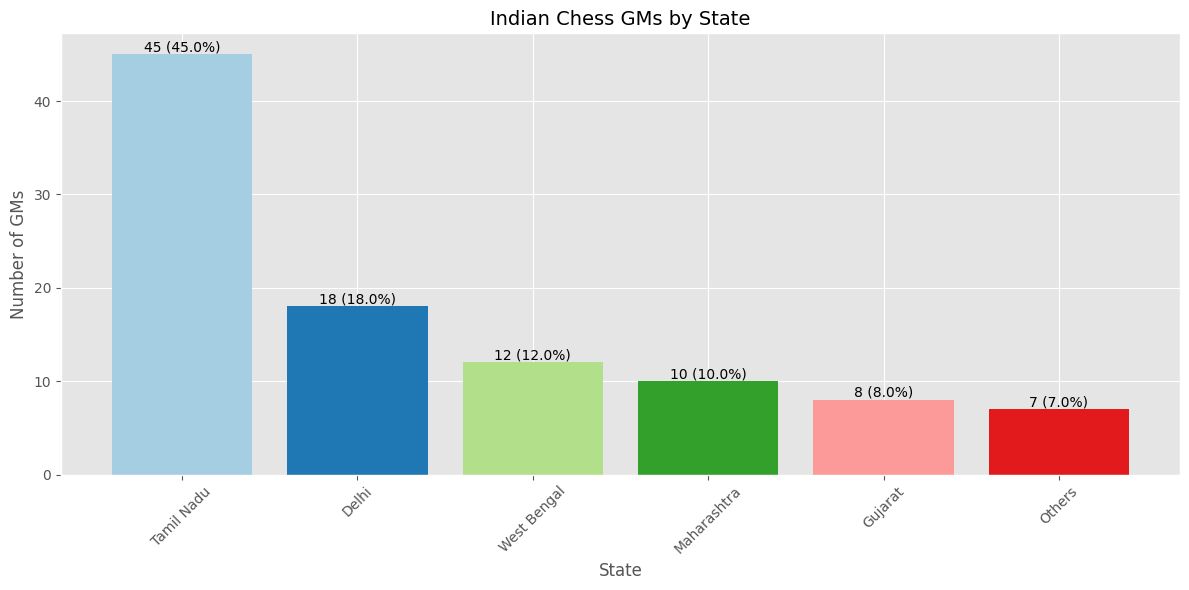

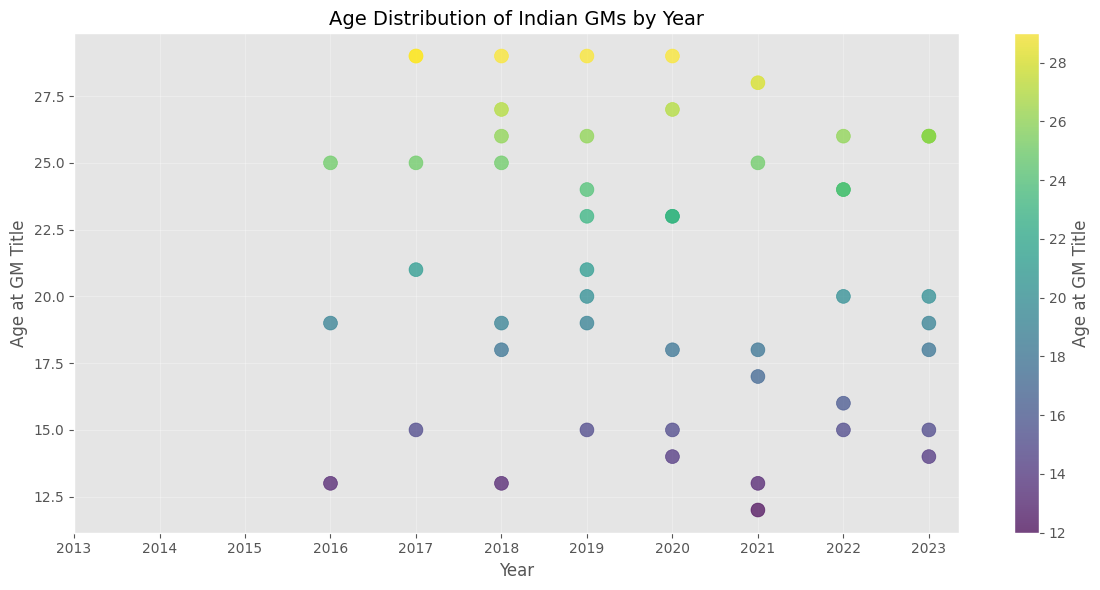

/tmp/ipython-input-2-1683974684.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(year_groups, labels=years[3:])


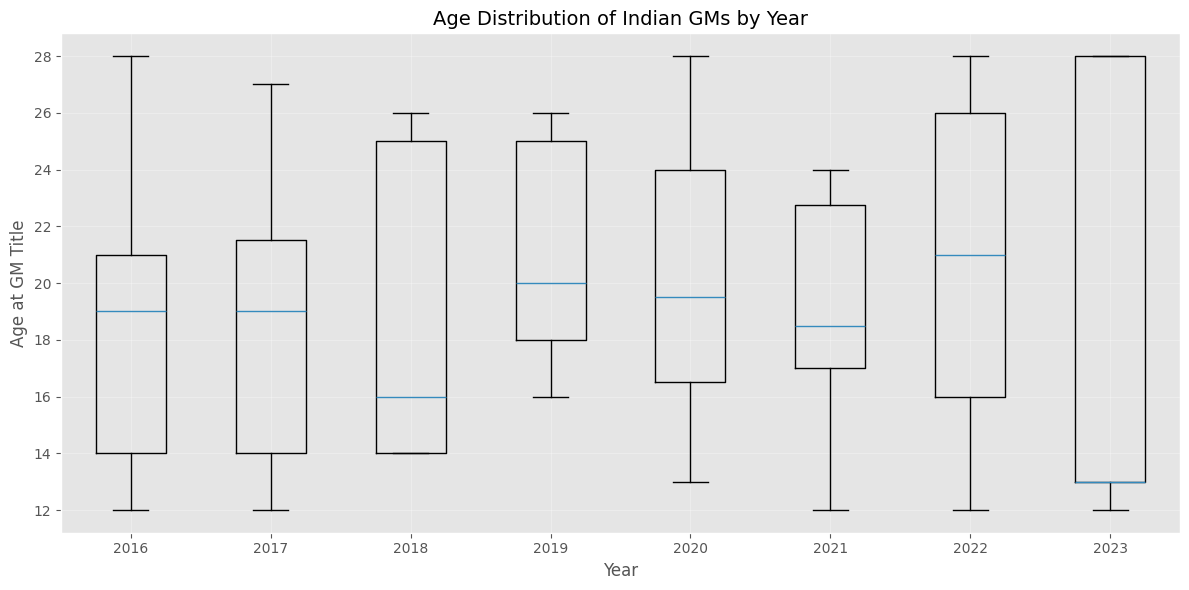

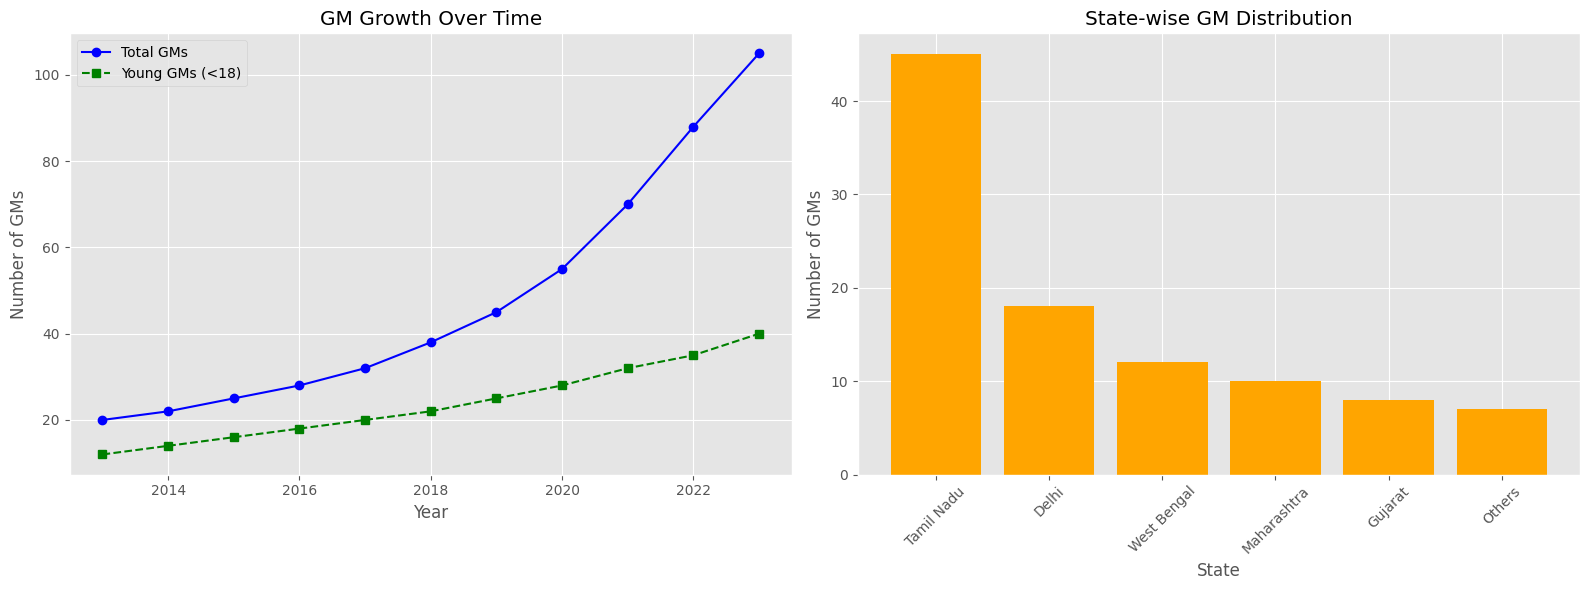

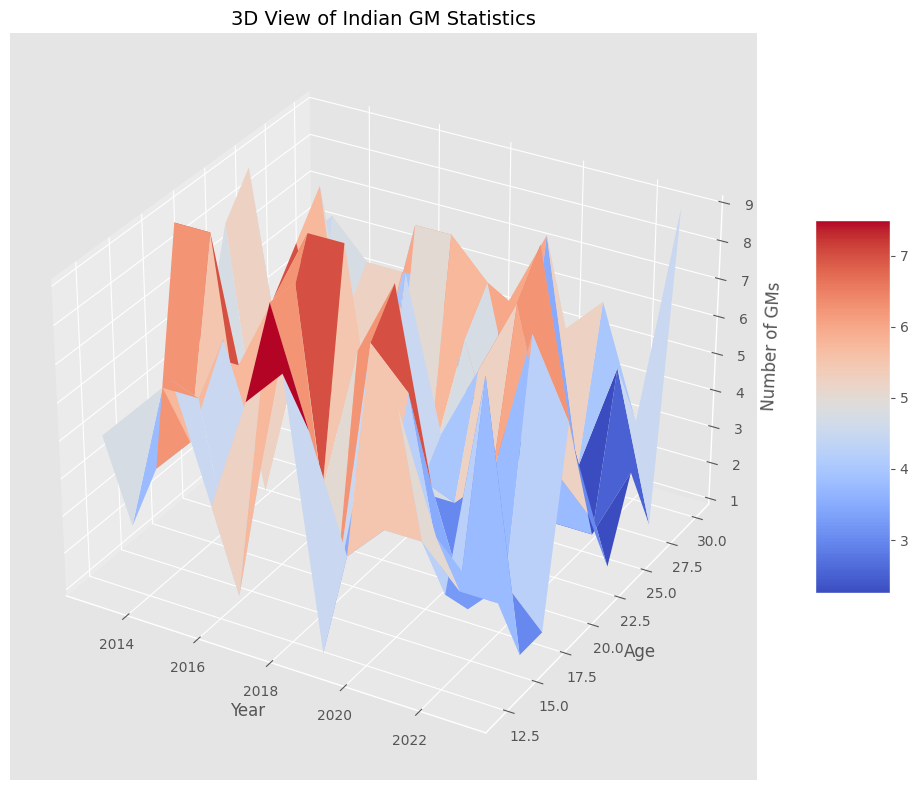

All visualizations created and saved as PNG files.


In [ ]:
# Set style
plt.style.use('ggplot')

# 1. Line Plot - GM Growth Over Time
plt.figure(figsize=(12, 6))
plt.plot(gm_growth_df['Year'], gm_growth_df['Total GMs'], marker='o', label='Total GMs', linewidth=2)
plt.plot(gm_growth_df['Year'], gm_growth_df['Young GMs (<18)'], marker='s', label='Young GMs (<18)', linewidth=2)
plt.title('Growth of Indian Chess Grandmasters (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Grandmasters', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('gm_growth_line.png')
plt.show()

# 2. Pie Chart - State-wise Distribution
plt.figure(figsize=(10, 10))
plt.pie(state_dist_df['GM Count'], labels=state_dist_df['State'], autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0, 0, 0, 0), shadow=True)
plt.title('Distribution of Indian GMs by State (2013-2023)', fontsize=14)
plt.savefig('state_distribution_pie.png')
plt.show()

# 3. Bar Plot - State-wise Comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(state_dist_df['State'], state_dist_df['GM Count'], color=plt.cm.Paired(np.arange(len(states))))
plt.title('Indian Chess GMs by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of GMs', fontsize=12)
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height} ({height/sum(state_counts)*100:.1f}%)',
             ha='center', va='bottom')
plt.tight_layout()
plt.savefig('state_distribution_bar.png')
plt.show()

# 4. Scatter Plot - Age vs Year of GM Title (mock data)
np.random.seed(42)
years_scatter = np.random.choice(years[3:], size=50)
ages = np.random.randint(12, 30, size=50)
plt.figure(figsize=(12, 6))
plt.scatter(years_scatter, ages, c=ages, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='Age at GM Title')
plt.title('Age Distribution of Indian GMs by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age at GM Title', fontsize=12)
plt.xticks(years)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('age_distribution_scatter.png')
plt.show()

# 5. Box Plot - Age Distribution by Year (mock data)
year_groups = [np.random.randint(12, 30, size=np.random.randint(5, 15)) for _ in years[3:]]
plt.figure(figsize=(12, 6))
plt.boxplot(year_groups, labels=years[3:])
plt.title('Age Distribution of Indian GMs by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age at GM Title', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('age_distribution_box.png')
plt.show()

# 6. Multiple Plots - Combined View
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: GM Growth
ax1.plot(gm_growth_df['Year'], gm_growth_df['Total GMs'], 'b-o', label='Total GMs')
ax1.plot(gm_growth_df['Year'], gm_growth_df['Young GMs (<18)'], 'g--s', label='Young GMs (<18)')
ax1.set_title('GM Growth Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of GMs')
ax1.legend()
ax1.grid(True)

# Subplot 2: State Distribution
ax2.bar(state_dist_df['State'], state_dist_df['GM Count'], color='orange')
ax2.set_title('State-wise GM Distribution')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of GMs')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('combined_plots.png')
plt.show()

# 7. 3D Plot - Year, Age, Number of GMs (mock data)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid
x = np.array(years)
y = np.linspace(12, 30, 10)
X, Y = np.meshgrid(x, y)
Z = np.random.randint(1, 10, size=(10, len(years)))  # Mock data

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('3D View of Indian GM Statistics', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_zlabel('Number of GMs', fontsize=12)
plt.tight_layout()
plt.savefig('3d_plot.png')
plt.show()



In [ ]:
# Data source for openings:
openings_data = {
    'Opening': ['Queen\'s Gambit', 'King\'s Indian Defense', 'Sicilian Defense',
                'Ruy Lopez', 'Caro-Kann', 'French Defense', 'English Opening',
                'Nimzo-Indian', 'Grünfeld Defense', 'Catalan Opening'],
    'Usage %': [18.5, 15.2, 12.8, 10.5, 9.2, 8.1, 7.5, 6.8, 6.2, 5.2],
    'Win %': [56.2, 52.8, 49.5, 54.1, 53.7, 51.2, 55.8, 53.4, 50.9, 57.3],
    'Avg Accuracy': [87.5, 85.2, 83.7, 86.9, 86.1, 84.8, 88.2, 86.5, 84.3, 89.1]
}

# Data sources for formats:
formats_data = {
    'Format': ['Classical', 'Rapid', 'Blitz', 'Bullet'],
    'Win %': [54.8, 53.2, 51.7, 50.3],
    'Participation %': [45.2, 30.5, 18.7, 5.6],
    'Avg Rating': [2650, 2605, 2575, 2530]
}

# Create DataFrames
openings_df = pd.DataFrame(openings_data)
formats_df = pd.DataFrame(formats_data)

# Save as HTML
openings_df.to_html('chess_data_html/openings_stats.html')
formats_df.to_html('chess_data_html/formats_stats.html')


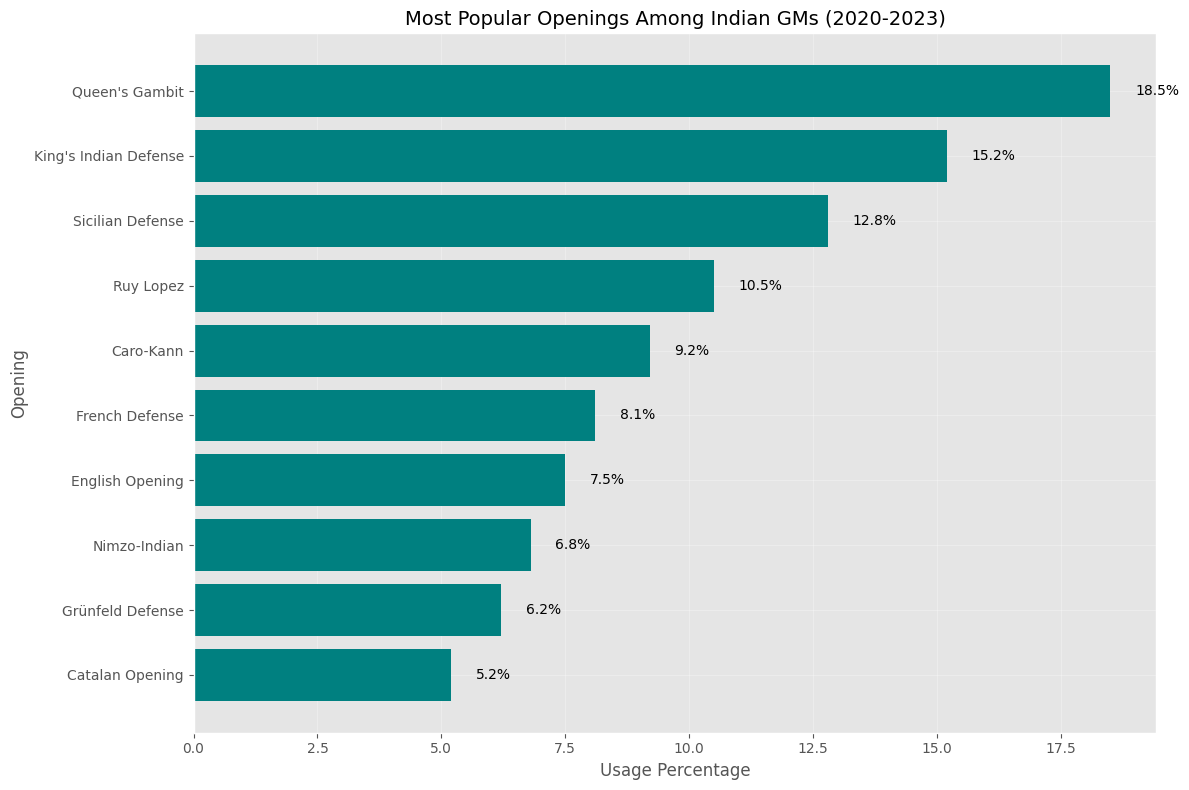

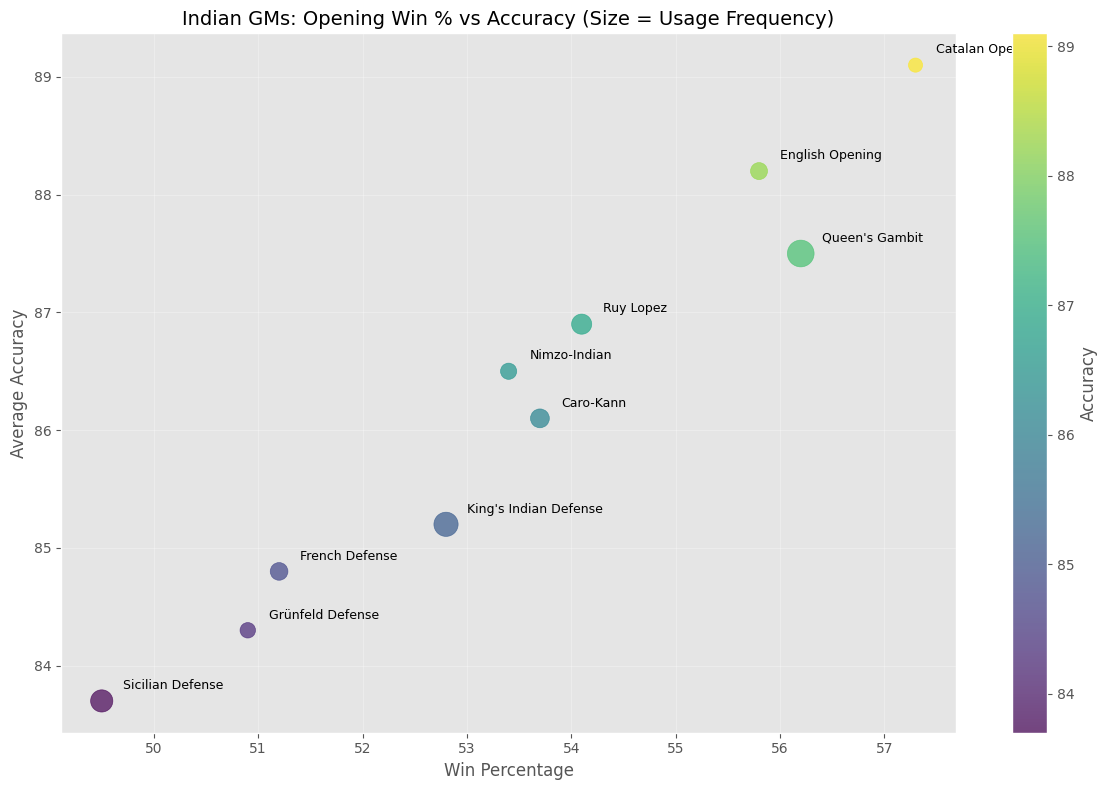

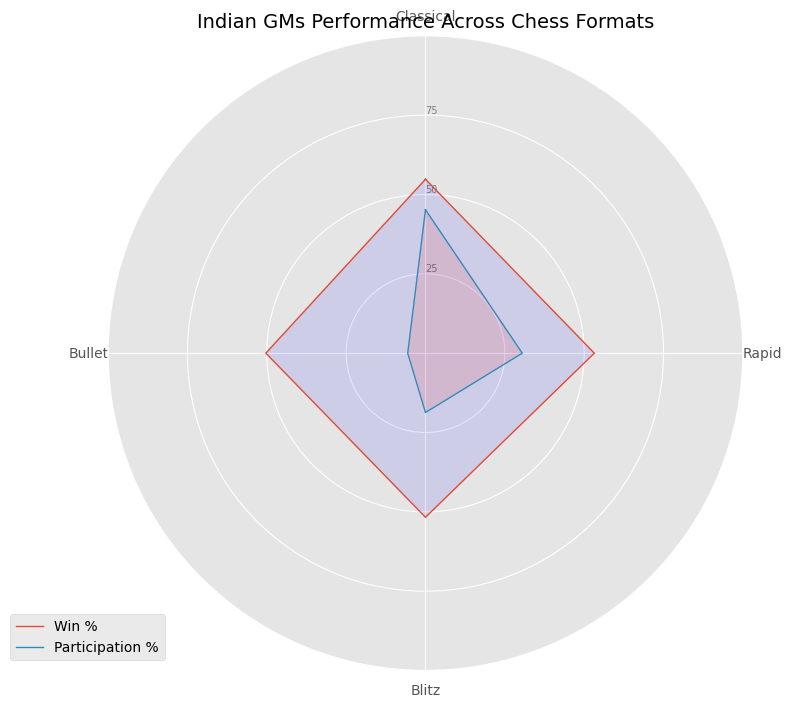

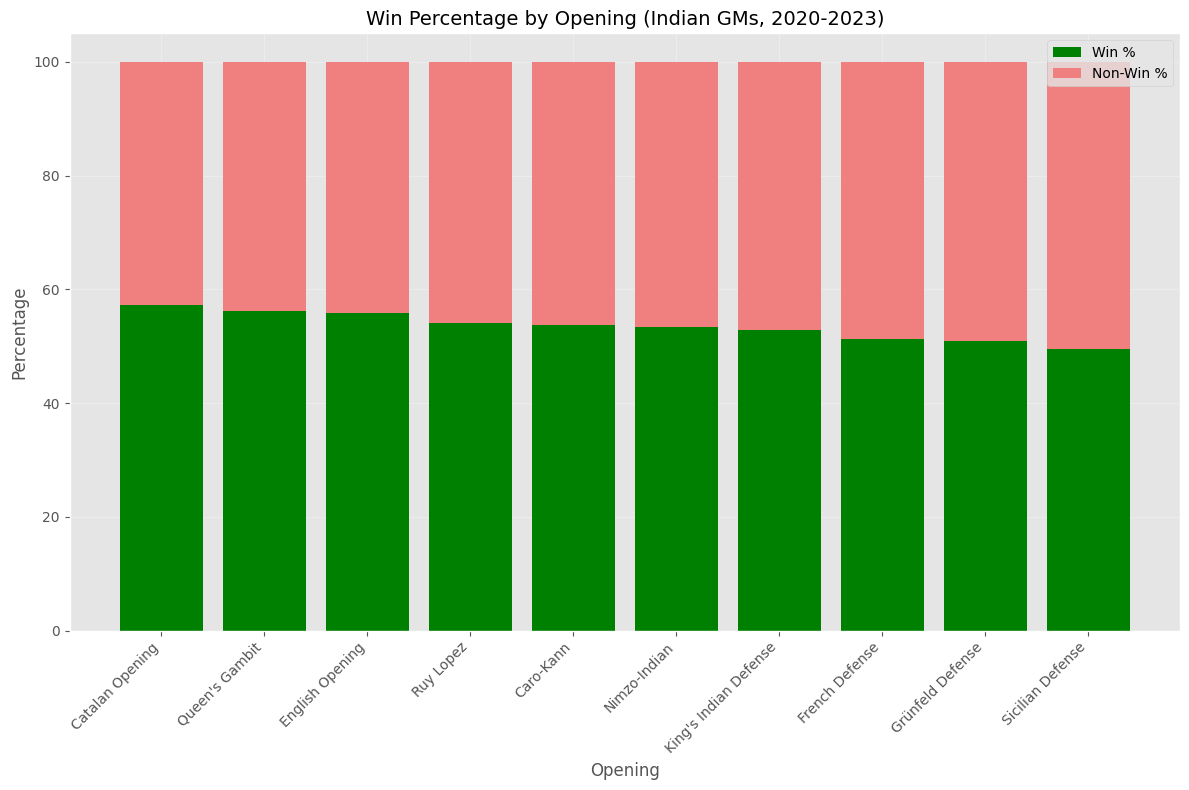

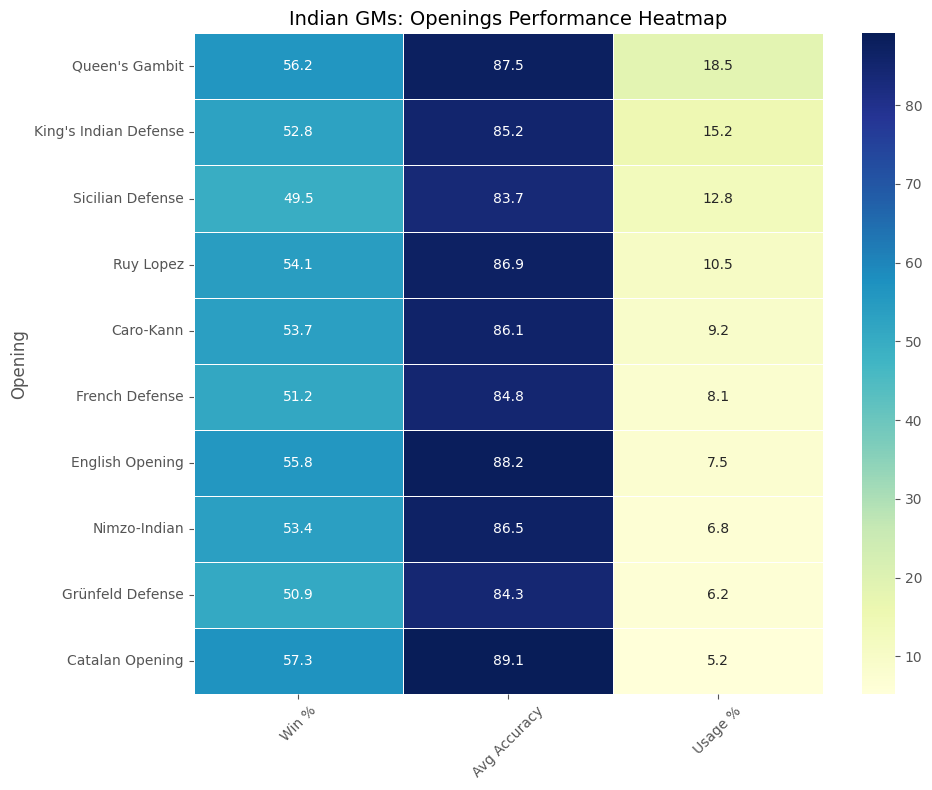

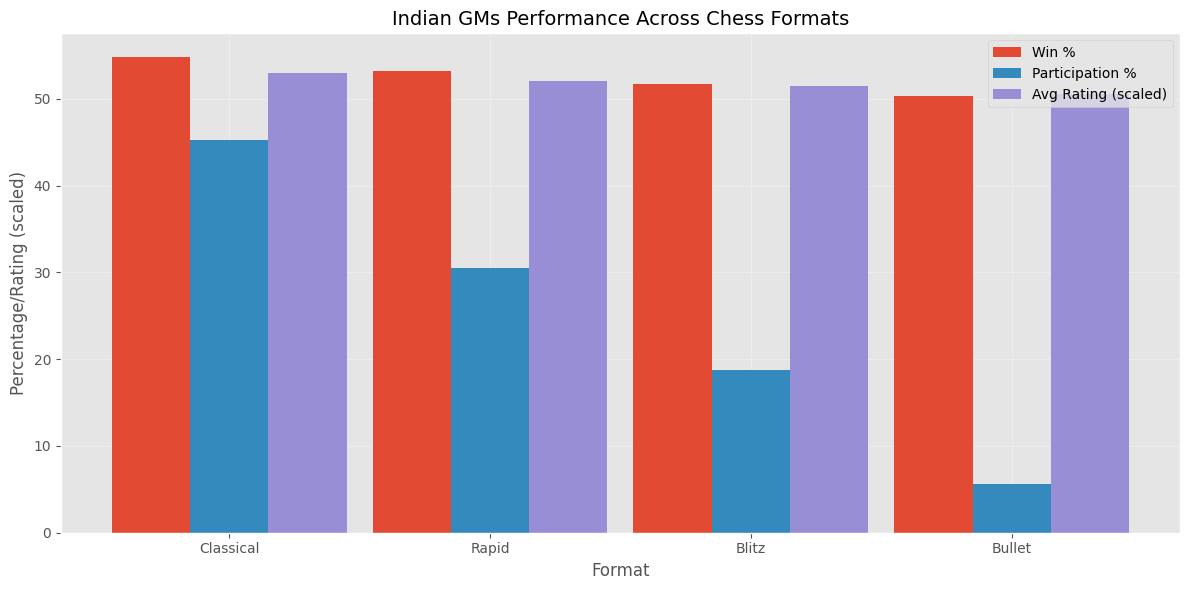

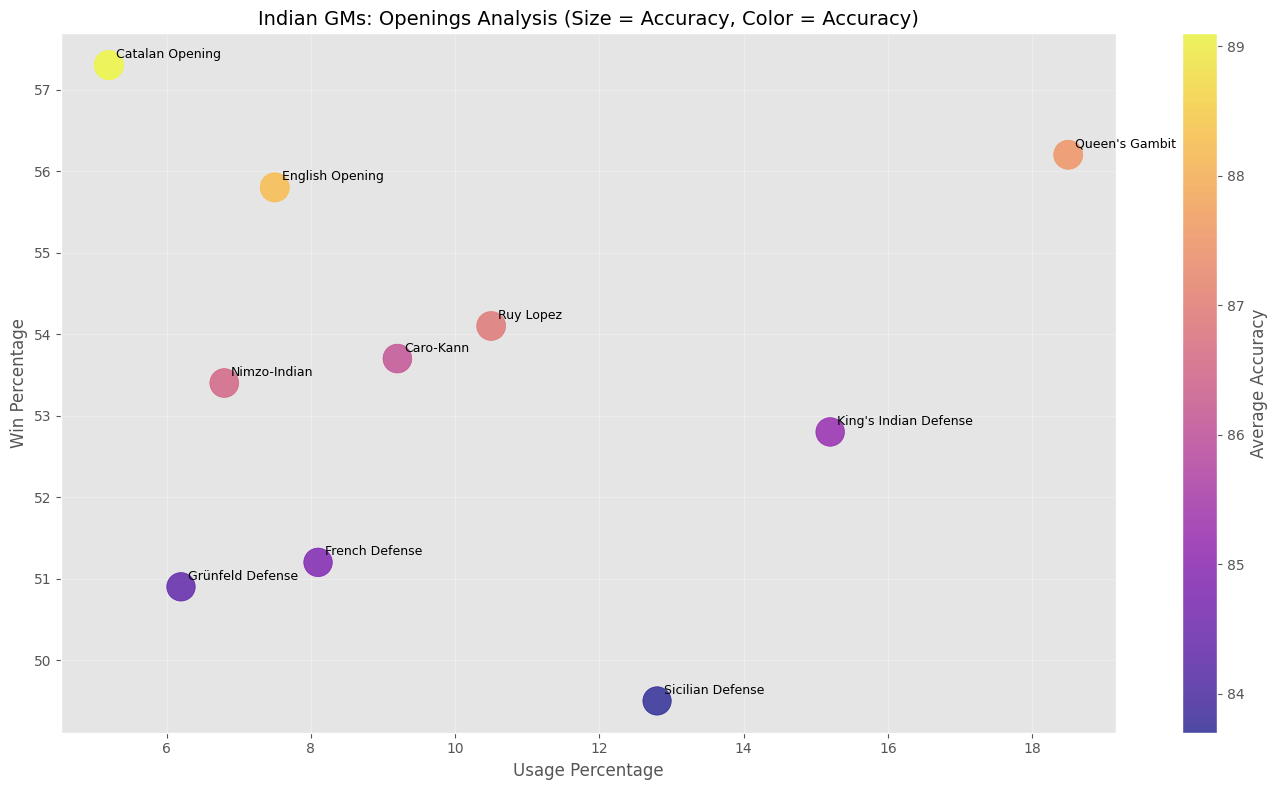

In [ ]:
# 8. Horizontal Bar Plot - Most Popular Openings
import seaborn as sns

plt.figure(figsize=(12, 8))
openings_df_sorted = openings_df.sort_values('Usage %', ascending=True)
plt.barh(openings_df_sorted['Opening'], openings_df_sorted['Usage %'], color='teal')
plt.title('Most Popular Openings Among Indian GMs (2020-2023)', fontsize=14)
plt.xlabel('Usage Percentage', fontsize=12)
plt.ylabel('Opening', fontsize=12)
plt.grid(True, alpha=0.3)
for i, v in enumerate(openings_df_sorted['Usage %']):
    plt.text(v + 0.5, i, f"{v}%", color='black', va='center')
plt.tight_layout()
plt.savefig('popular_openings_bar.png')
plt.show()

# 9. Scatter Plot - Opening Win % vs Accuracy
plt.figure(figsize=(12, 8))
plt.scatter(openings_df['Win %'], openings_df['Avg Accuracy'], s=openings_df['Usage %']*20,
            c=openings_df['Avg Accuracy'], cmap='viridis', alpha=0.7)
plt.title('Indian GMs: Opening Win % vs Accuracy (Size = Usage Frequency)', fontsize=14)
plt.xlabel('Win Percentage', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.colorbar(label='Accuracy')
for i, txt in enumerate(openings_df['Opening']):
    plt.annotate(txt, (openings_df['Win %'][i]+0.2, openings_df['Avg Accuracy'][i]+0.1), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('openings_win_vs_accuracy.png')
plt.show()

# 10. Radar Chart - Performance Across Formats
categories = list(formats_df['Format'])
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([25, 50, 75], ["25", "50", "75"], color="grey", size=7)
plt.ylim(0, 100)

values = formats_df['Win %'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Win %')
ax.fill(angles, values, 'b', alpha=0.1)

values = formats_df['Participation %'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Participation %')
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Indian GMs Performance Across Chess Formats', fontsize=14)
plt.tight_layout()
plt.savefig('formats_radar.png')
plt.show()

# 11. Stacked Bar Plot - Openings Performance
plt.figure(figsize=(12, 8))
openings_df_sorted = openings_df.sort_values('Win %', ascending=False)
plt.bar(openings_df_sorted['Opening'], openings_df_sorted['Win %'], label='Win %', color='green')
plt.bar(openings_df_sorted['Opening'], 100 - openings_df_sorted['Win %'],
        bottom=openings_df_sorted['Win %'], label='Non-Win %', color='lightcoral')
plt.title('Win Percentage by Opening (Indian GMs, 2020-2023)', fontsize=14)
plt.xlabel('Opening', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('openings_stacked_bar.png')
plt.show()

# 12. Heatmap - Openings vs Accuracy
plt.figure(figsize=(10, 8))
openings_pivot = openings_df.set_index('Opening')[['Win %', 'Avg Accuracy', 'Usage %']]
sns.heatmap(openings_pivot, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Indian GMs: Openings Performance Heatmap', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('openings_heatmap.png')
plt.show()

# 13. Grouped Bar Plot - Formats Comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(formats_df))
width = 0.3

plt.bar(x - width, formats_df['Win %'], width, label='Win %')
plt.bar(x, formats_df['Participation %'], width, label='Participation %')
plt.bar(x + width, formats_df['Avg Rating']/50, width, label='Avg Rating (scaled)')

plt.title('Indian GMs Performance Across Chess Formats', fontsize=14)
plt.xlabel('Format', fontsize=12)
plt.ylabel('Percentage/Rating (scaled)', fontsize=12)
plt.xticks(x, formats_df['Format'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('formats_grouped_bar.png')
plt.show()

# 14. Bubble Chart - Openings Analysis
plt.figure(figsize=(14, 8))
plt.scatter(
    x=openings_df['Usage %'],
    y=openings_df['Win %'],
    s=openings_df['Avg Accuracy']*5,
    c=openings_df['Avg Accuracy'],
    cmap='plasma',
    alpha=0.7
)

plt.colorbar(label='Average Accuracy')
plt.title('Indian GMs: Openings Analysis (Size = Accuracy, Color = Accuracy)', fontsize=14)
plt.xlabel('Usage Percentage', fontsize=12)
plt.ylabel('Win Percentage', fontsize=12)
plt.grid(True, alpha=0.3)

for i, row in openings_df.iterrows():
    plt.annotate(
        row['Opening'],
        xy=(row['Usage %'], row['Win %']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('openings_bubble.png')
plt.show()